 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
# Reading whale returns
whale_returns_csv = Path("Instructions/Starter_Code/Resources/whale_returns.csv")

# YOUR CODE HERE
whale_portfolio = pd.read_csv(whale_returns_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")

whale_portfolio.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls

# YOUR CODE HERE
whale_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_portfolio = whale_portfolio.dropna().copy()
whale_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Instructions/Starter_Code/Resources/algo_returns.csv")
# YOUR CODE HERE
algo_portfolio = pd.read_csv(algo_returns_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")
algo_portfolio.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [6]:
# Count nulls
# YOUR CODE HERE
algo_portfolio.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_portfolio = algo_portfolio.dropna().copy()
algo_portfolio.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Instructions/Starter_Code/Resources/sp500_history.csv")
# YOUR CODE HERE

sp500_portfolio = pd.read_csv(sp500_history_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")
sp500_portfolio.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_portfolio.dtypes

Close    object
dtype: object

In [10]:
sp500_portfolio["Close"] = sp500_portfolio["Close"].str.replace("$", "")

In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500_portfolio["Close"] = sp500_portfolio["Close"].astype("float")

sp500_portfolio.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE

daily_return = sp500_portfolio.pct_change()

daily_return.head()

Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279

In [13]:
# Drop nulls
# YOUR CODE HERE

daily_return = daily_return.dropna().copy()
daily_return.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename Column
# YOUR CODE HERE

daily_return = daily_return.rename(columns={
    "Close": "S&P 500"
})

daily_return.head()

S&P 500
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

## Combine Whale, Algorithmic, and S&P 500 Returns

In [49]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
cp = pd.concat([whale_portfolio, algo_portfolio, daily_return], axis='columns', join='inner')

cp.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   

              Algo 2   S&P 500  
Date                            
2019-04-15 -0.004572 -0.000509  
2019-04-16  0.002899  0.002279  
2019-04-17 -0.005228 -0.001577  
2019-04-18 -0.001229 -0.001011  
2019-04-22 -0.001936 -0.008764

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

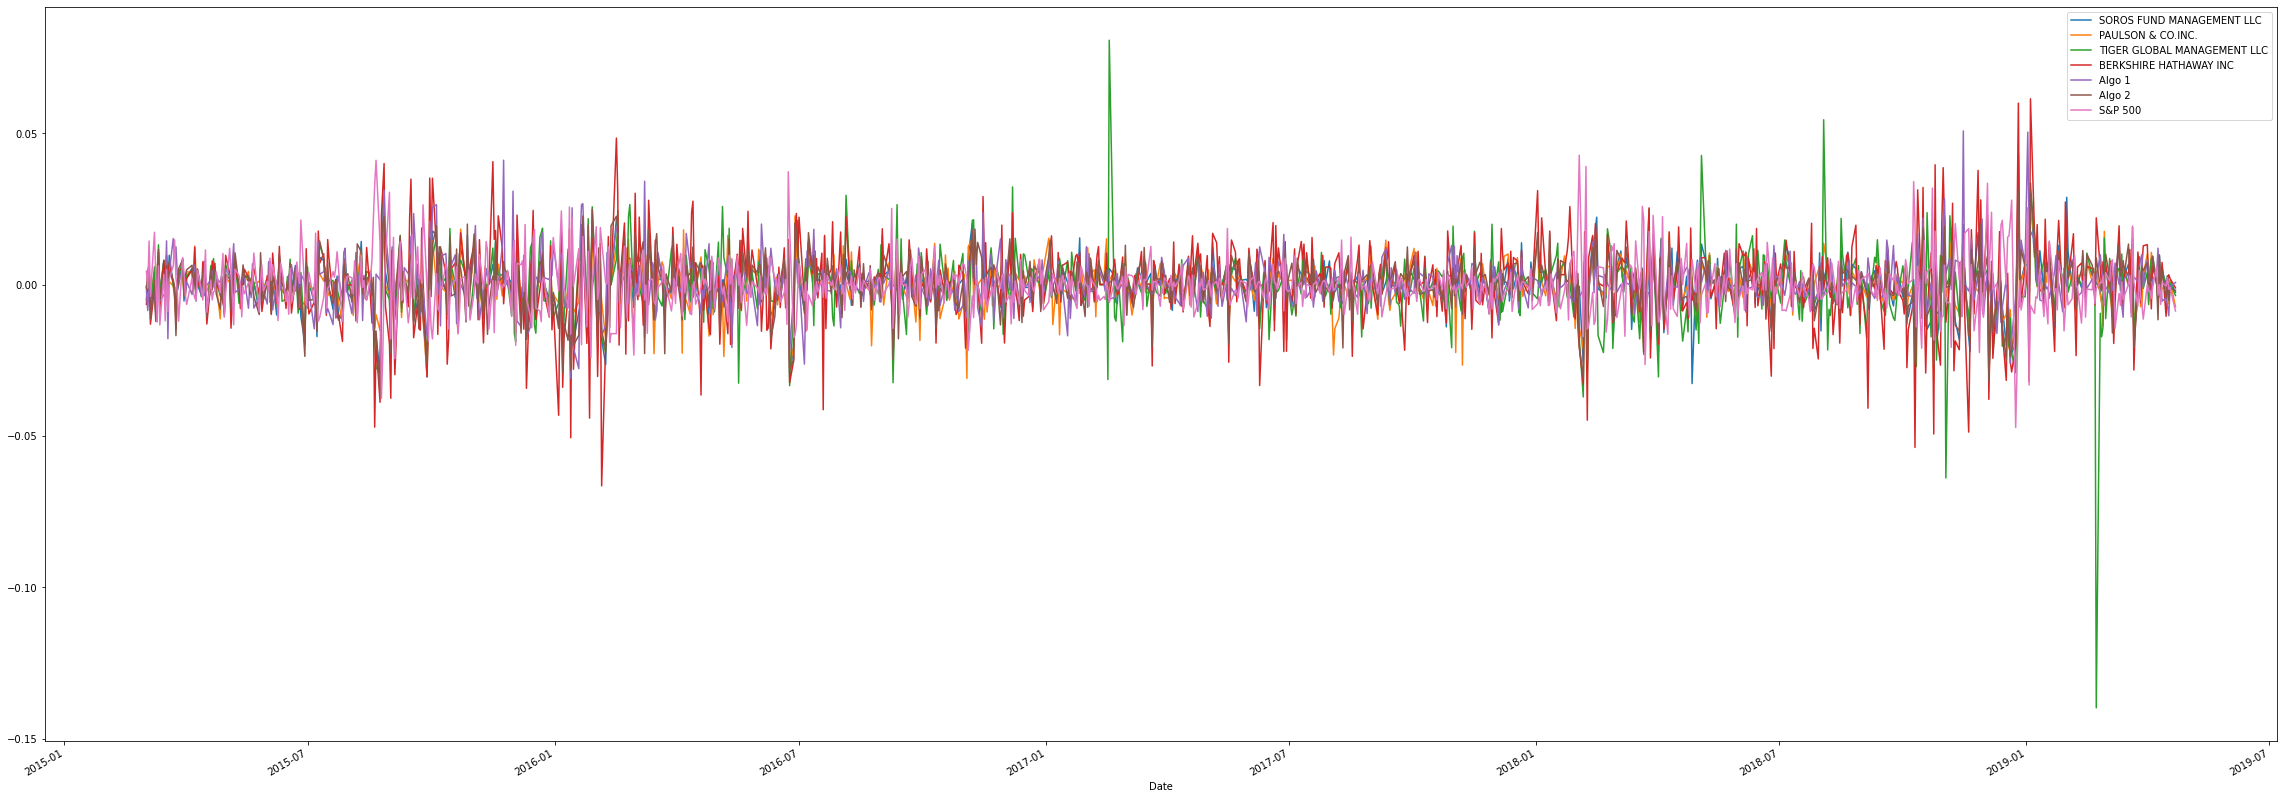

In [16]:
# Plot daily returns
# YOUR CODE HERE
cp.plot(figsize=(40,15))

In [17]:
cumulative_returns = (1 + cp).cumprod()

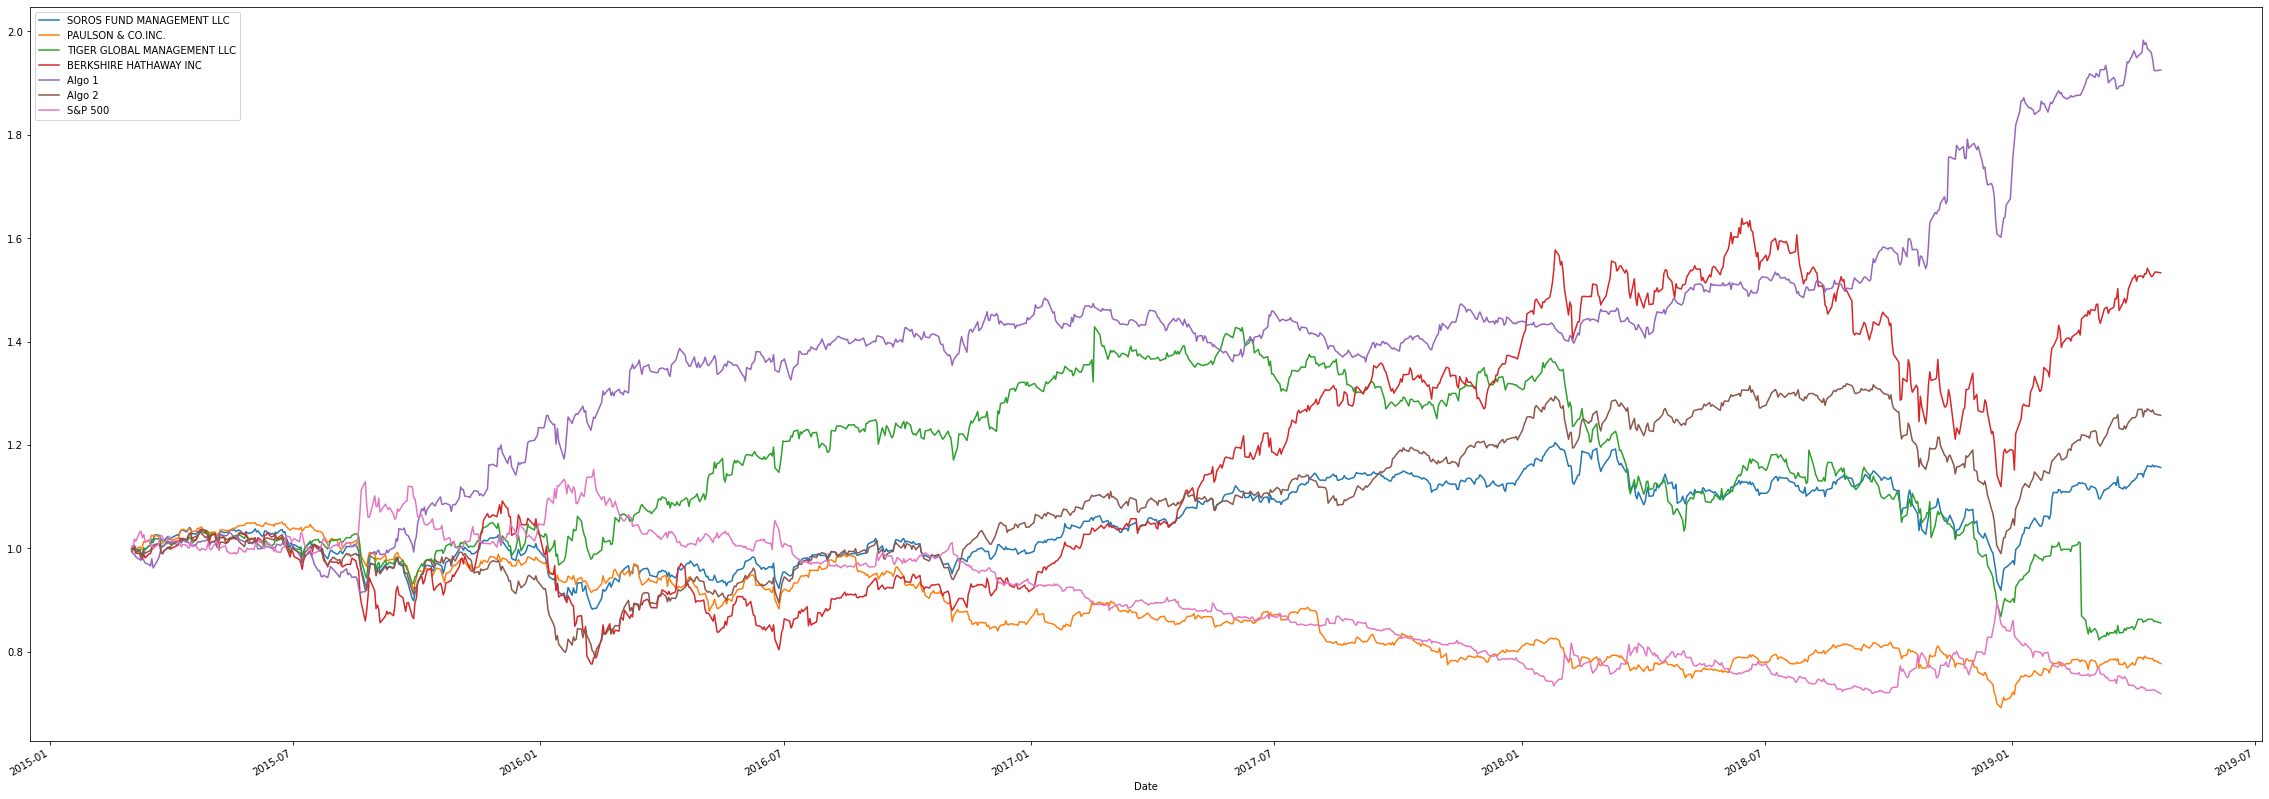

In [18]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns.plot(figsize=(40,15))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

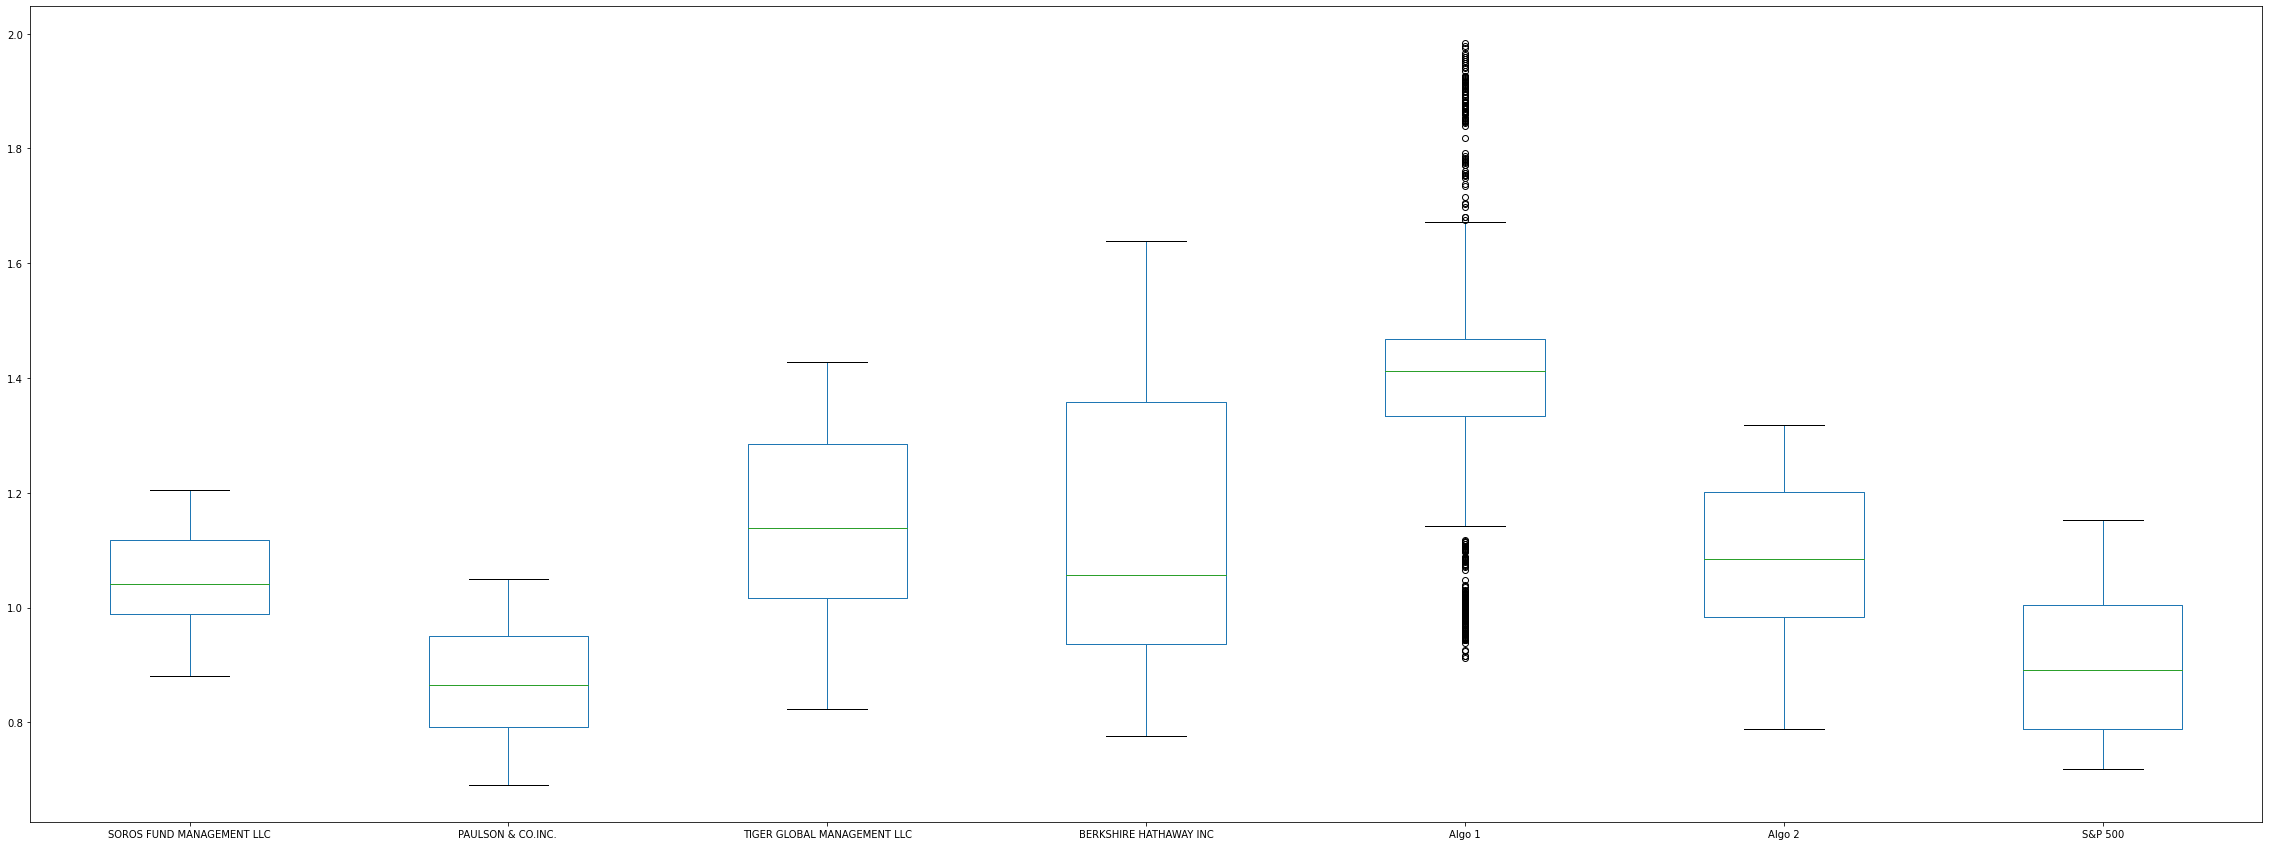

In [19]:
# Box plot to visually show risk
# YOUR CODE HERE
cumulative_returns.plot.box(figsize=(40,15))

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
cumulative_daily_std = cp.std()
cumulative_daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
cumulative_daily_std > cp["S&P 500"].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [22]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = cumulative_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

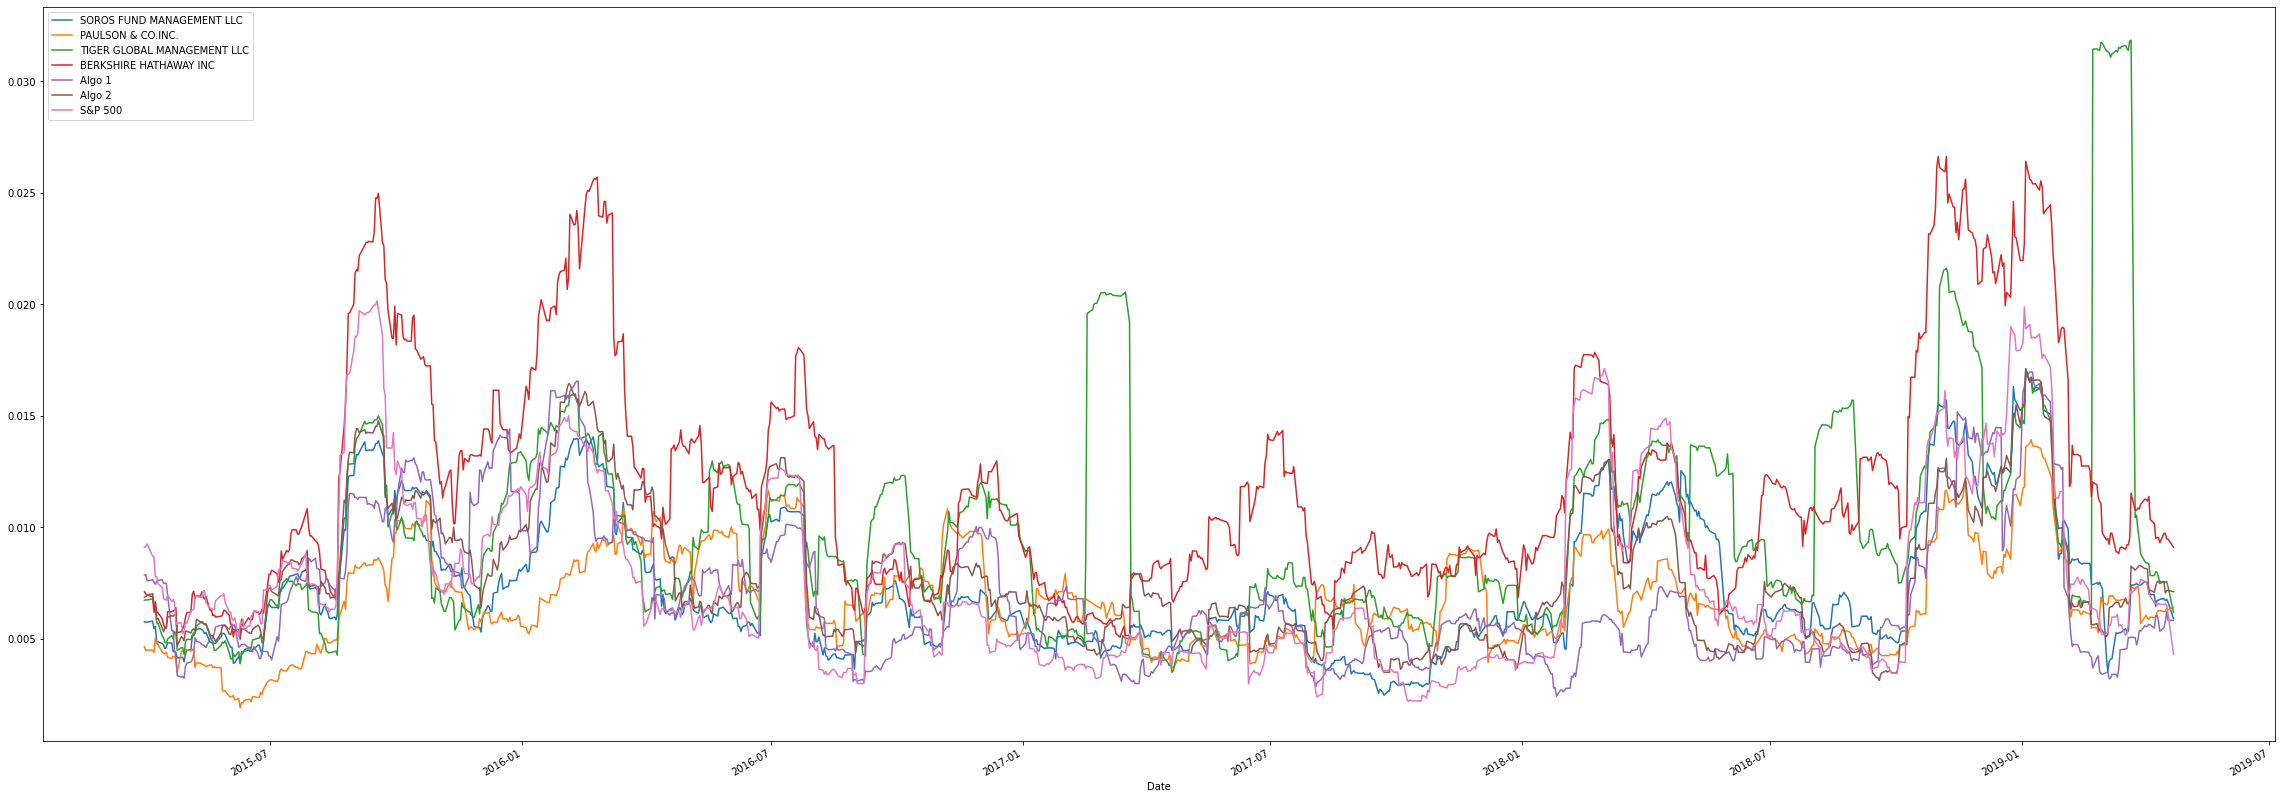

In [23]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
cp_rolling = cp.rolling(window=21).std().plot(figsize=(40,15))

In [24]:
# Construct a correlation table
# YOUR CODE HERE
correlation = cp.corr()

correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
S&P 500                                       0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2                                          0.507160   
S&P 500                                        -0.001505   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754157  0.320901  0.826730   
PAULSON & CO.INC.                          0.545451  0.268631  0.678085   
TIGER GLOBAL MANAGEMENT LLC                0.424125  0.164114  0.507160   
BERKSHIRE HATHAWAY INC                     1.000000  0.291678  0.687756   
Algo 1                                     0.291678  1.000000  0.287852   
Algo 2                                     0.687756  0.287852  1.000000   
S&P 500                                   -0.013856 -0.033963 -0.002192   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.000574  
PAULSON & CO.INC.            0.013549  
TIGER GLOBAL MANAGEMENT LLC -0.001505  
BERKSHIRE HATHAWAY INC      -0.013856  
Algo 1                      -0.033963  
Algo 2                      -0.002192  
S&P 500                      1.000000

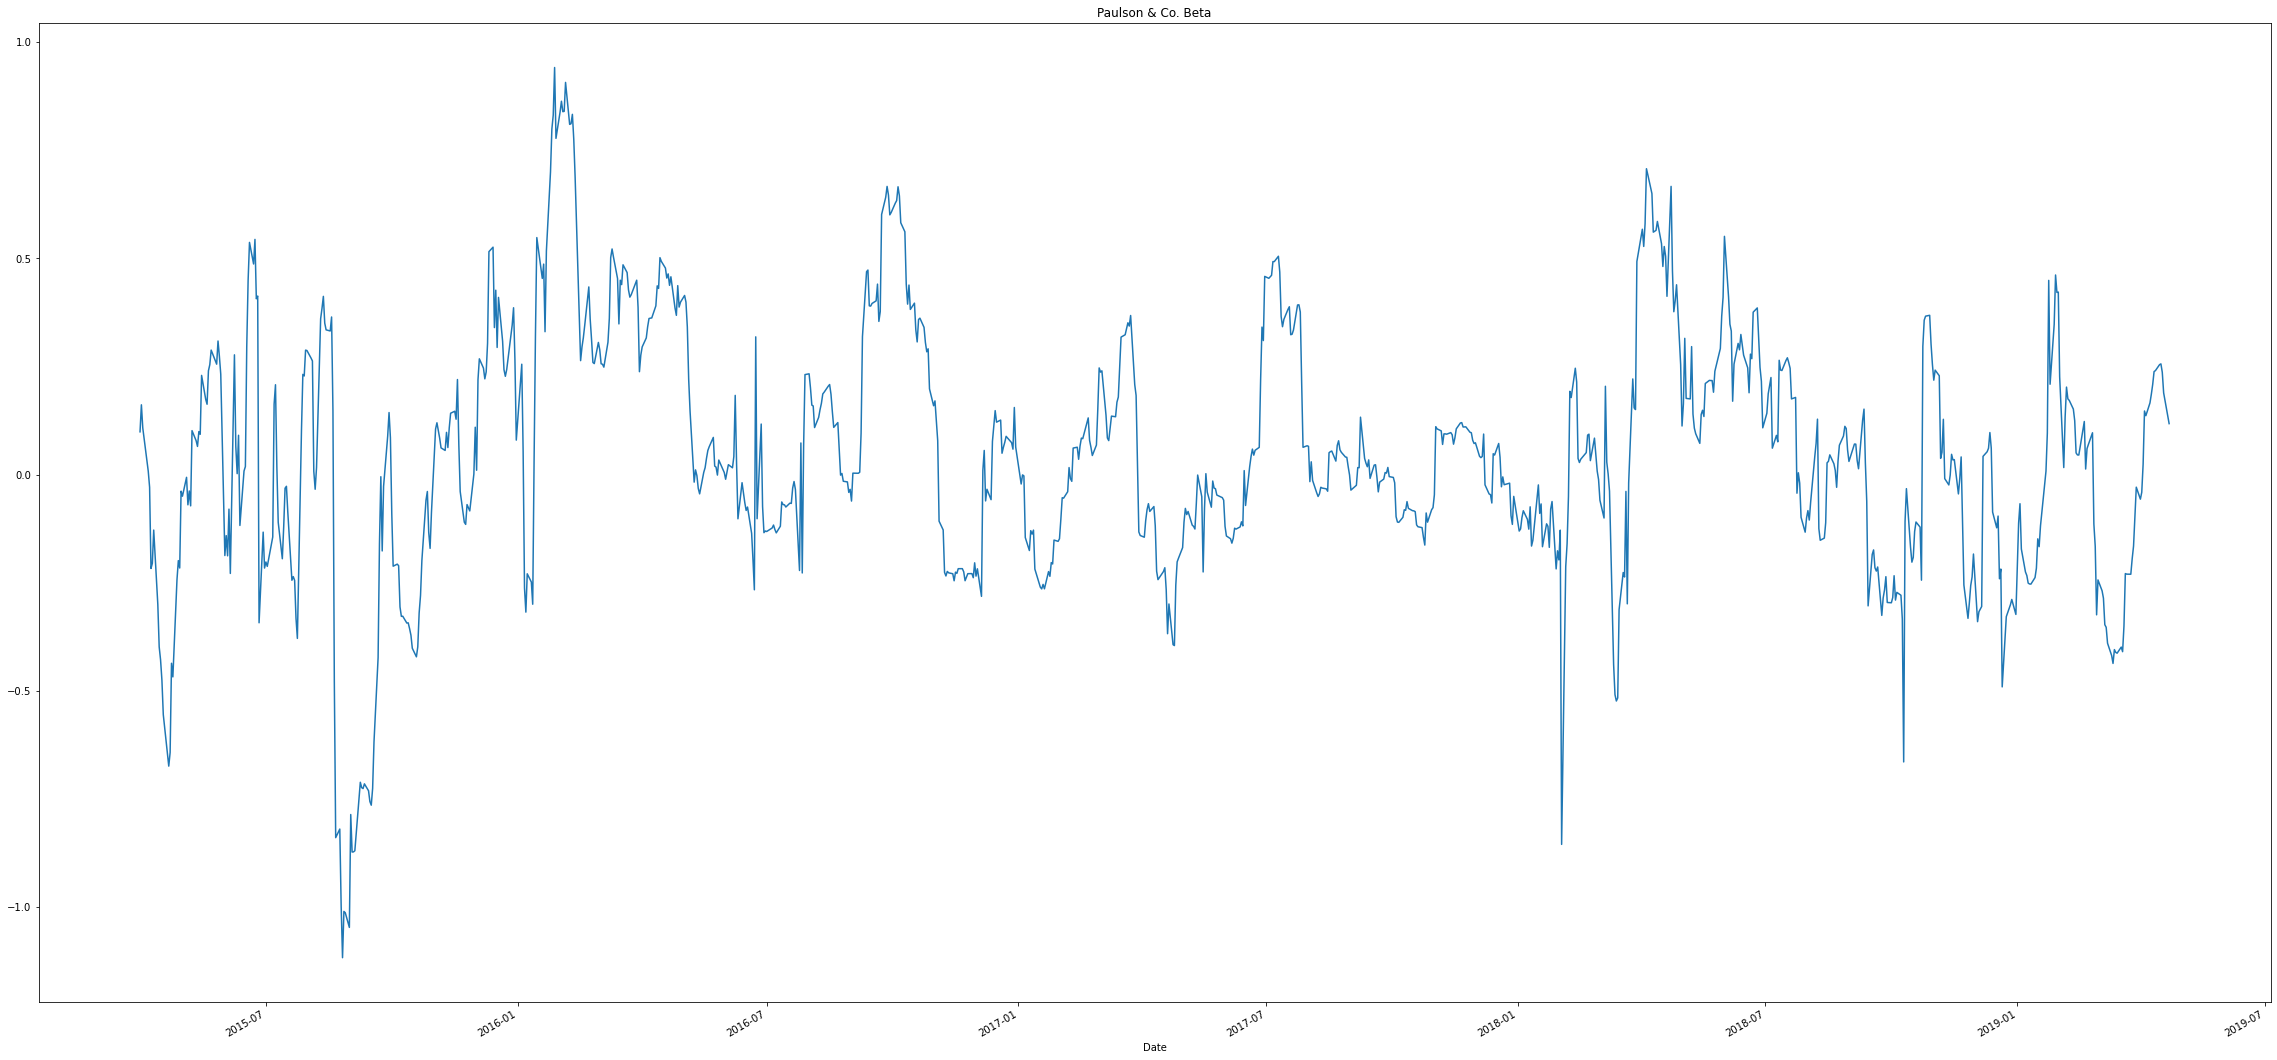

In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

paulson_rc = cp["PAULSON & CO.INC. "].rolling(window=21).cov(cp["S&P 500"])

rolling_variance = cp["PAULSON & CO.INC. "].rolling(window=21).var()

paulson_beta = paulson_rc / rolling_variance

paulson_beta.plot(figsize=(40,20), title='Paulson & Co. Beta')

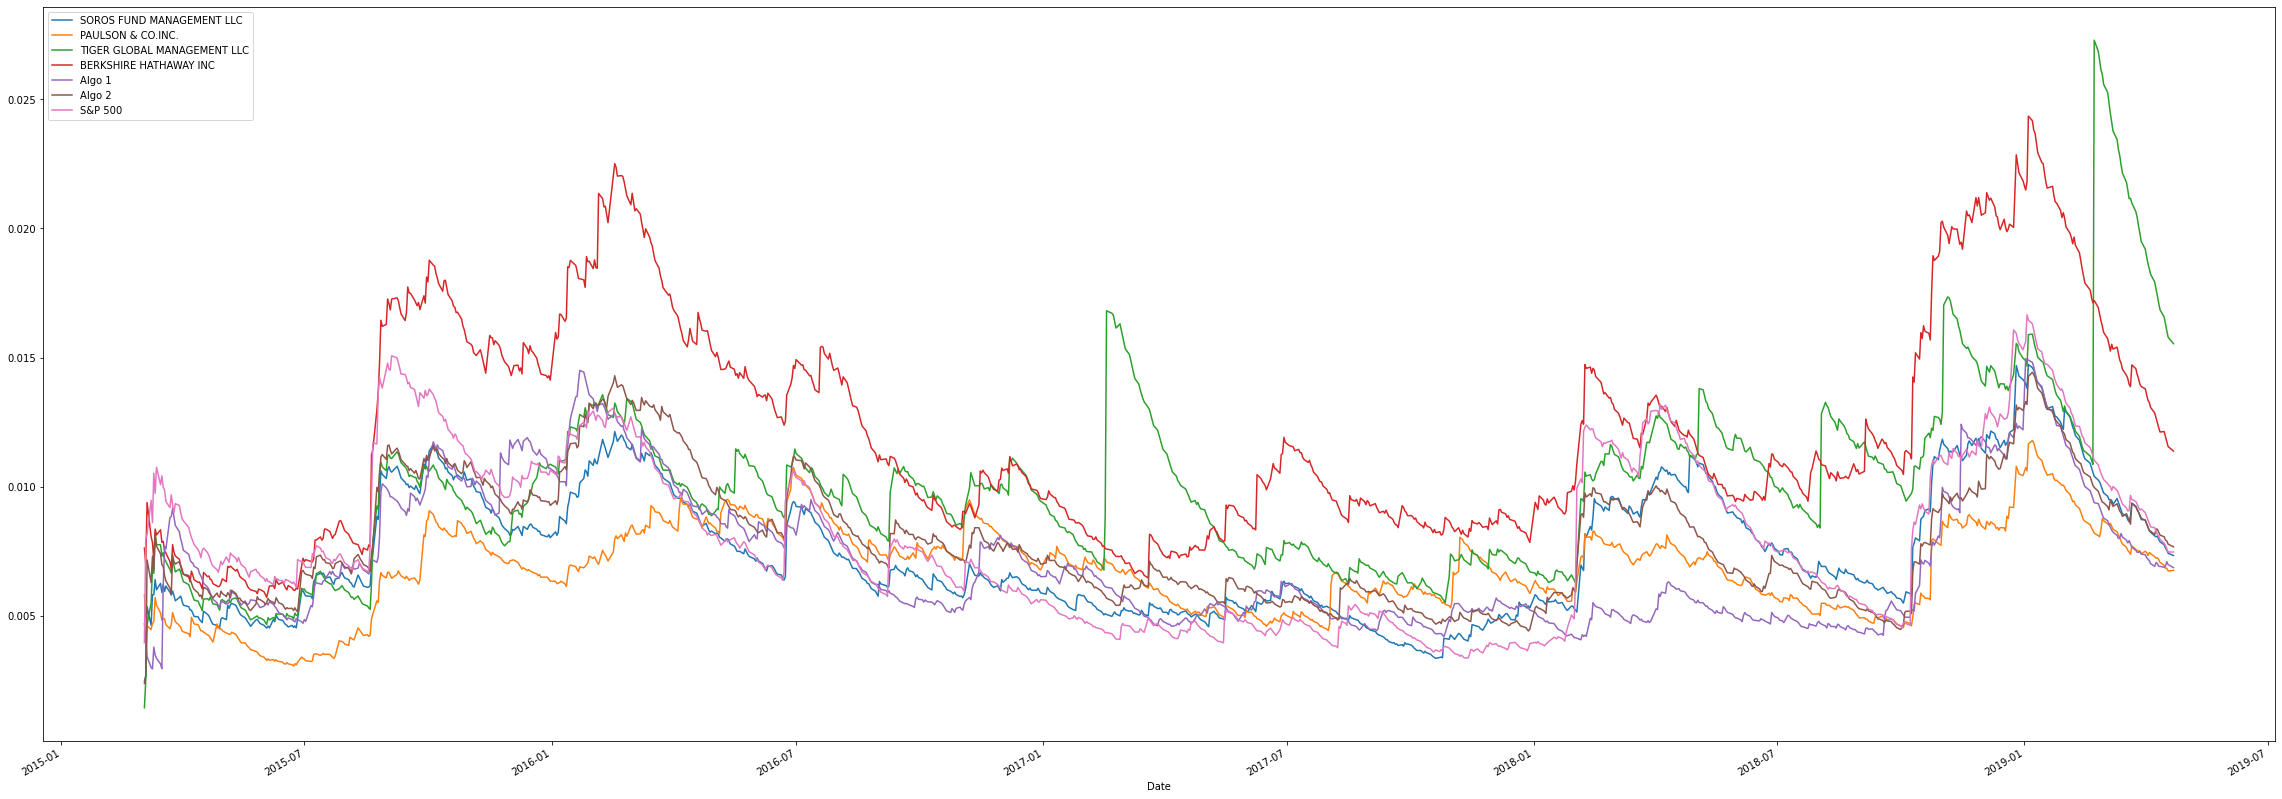

In [26]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

cp_ewm = cp.ewm(halflife=21).std()

cp_ewm.plot(figsize=(40,15))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [27]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (cp.mean() * 252) / (cumulative_daily_std * np.sqrt(252))

sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

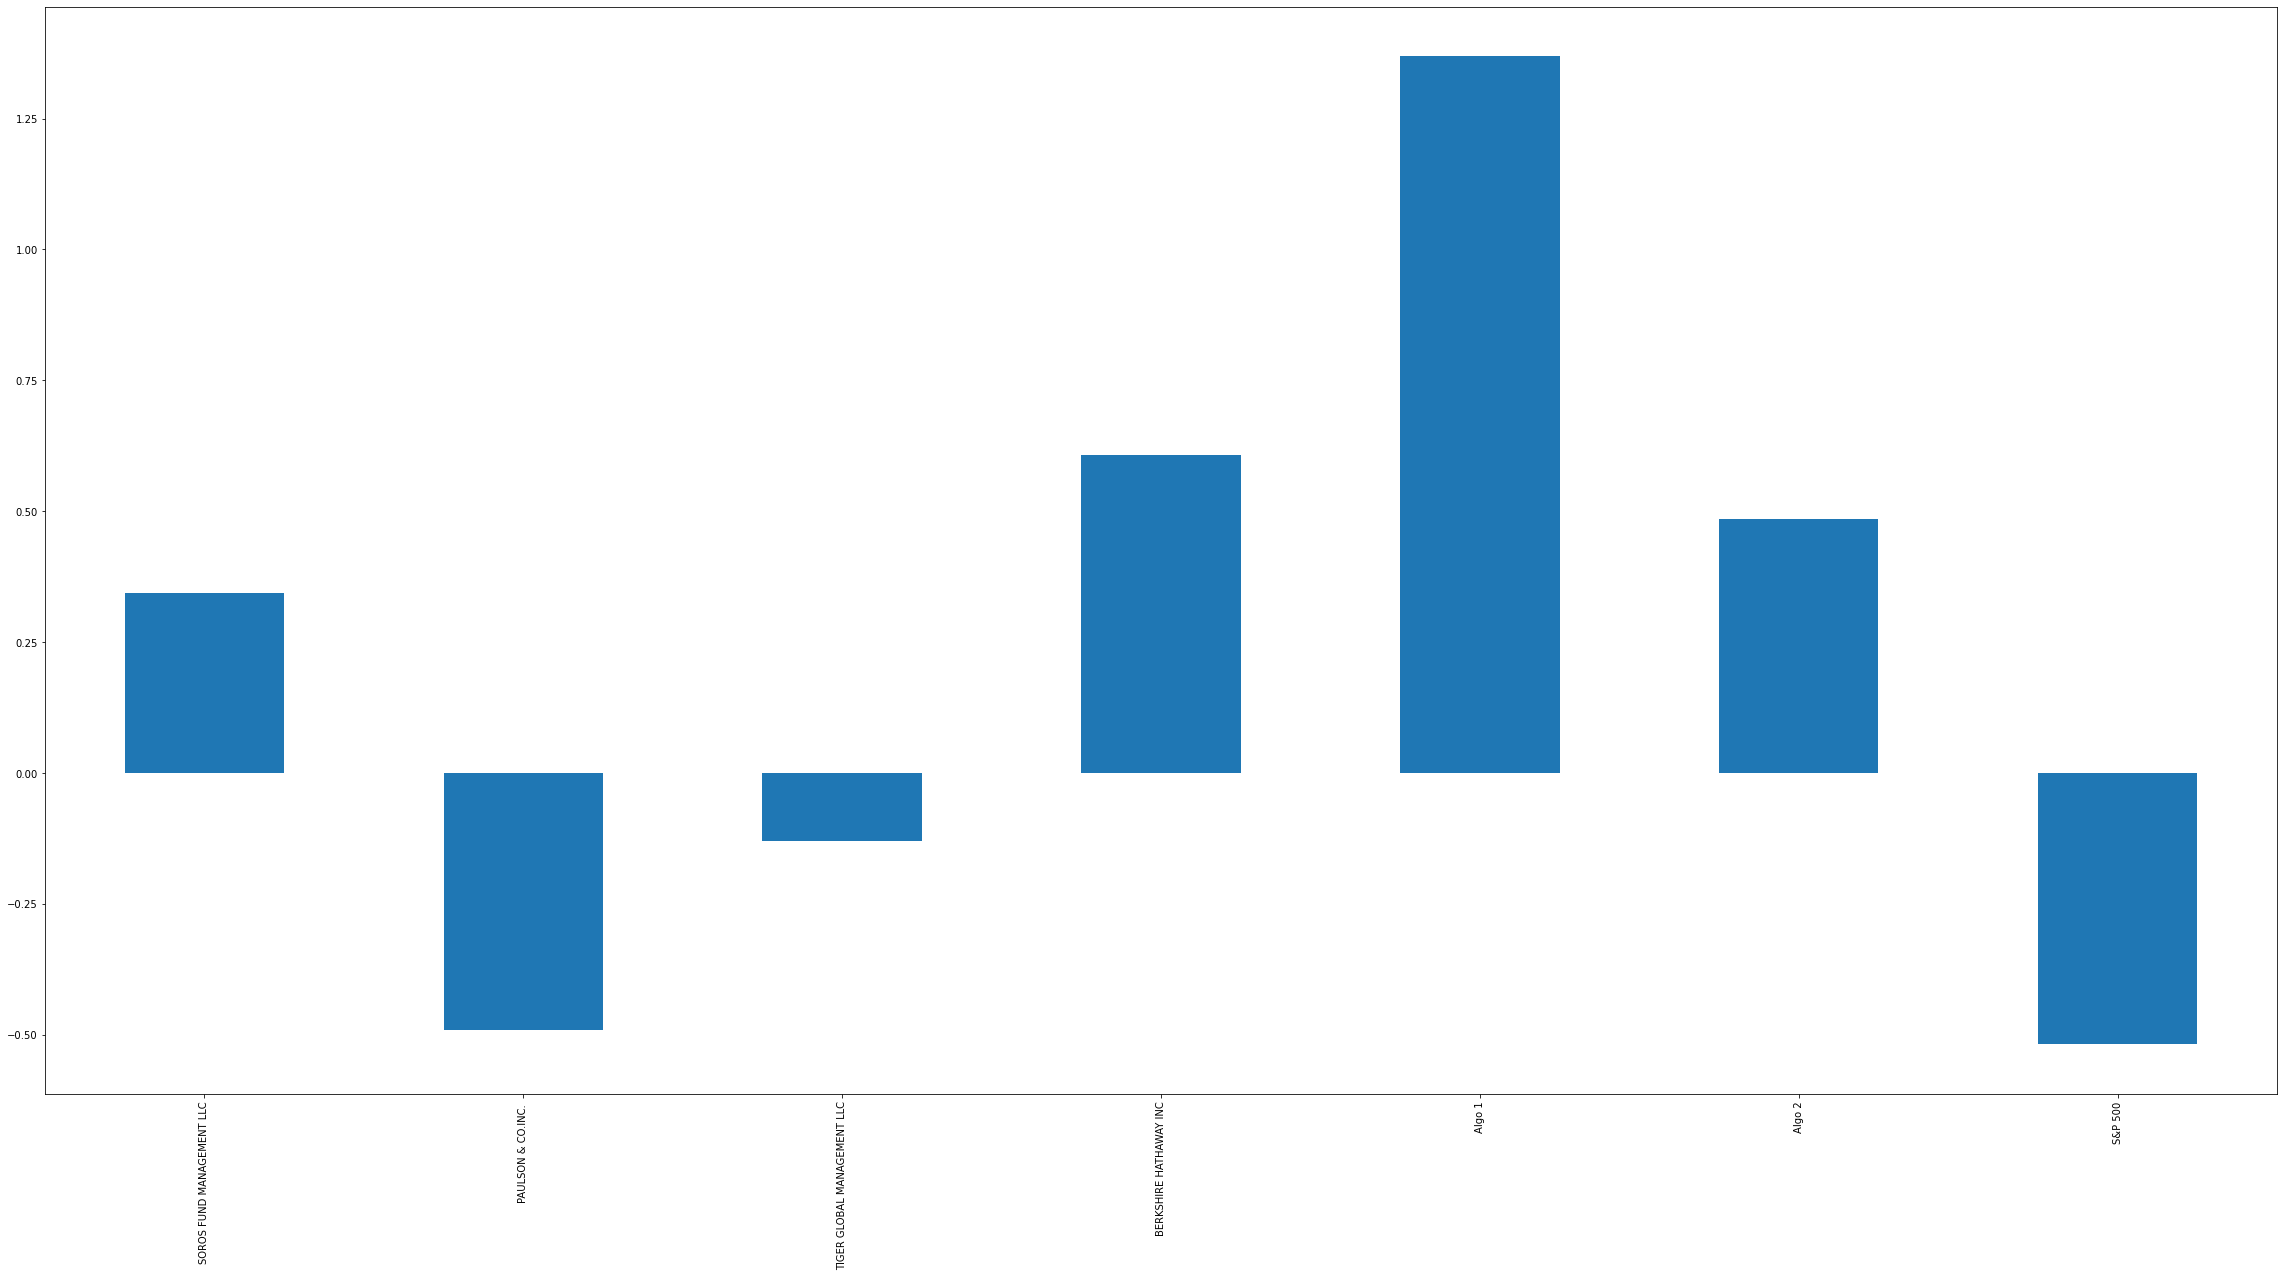

In [28]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratio.plot(kind='bar', figsize=(40,20))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Read the first stock
# YOUR CODE HERE
google_csv = Path("Instructions/Starter_Code/Resources/goog_historical.csv")

google_stock = pd.read_csv(google_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")

google_stock.head()

Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40

In [30]:
# Read the second stock
# YOUR CODE HERE
aapl_csv = Path("Instructions/Starter_Code/Resources/aapl_historical.csv")

aapl_stock = pd.read_csv(aapl_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")

aapl_stock.head()

Symbol    NOCP
Trade DATE               
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75

In [31]:
# Read the third stock
# YOUR CODE HERE
cost_csv = Path("Instructions/Starter_Code/Resources/cost_historical.csv")

cost_stock = pd.read_csv(cost_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")

cost_stock.head()

Symbol    NOCP
Trade DATE               
2019-05-09   COST  243.47
2019-05-08   COST  241.34
2019-05-07   COST  240.18
2019-05-06   COST  244.23
2019-05-03   COST  244.62

In [32]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks = pd.concat([google_stock, aapl_stock, cost_stock], axis='rows', join='inner')

all_stocks.head()

Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40

In [38]:
# Reset the index
# YOUR CODE HERE
all_stocks.reset_index()

Trade DATE Symbol     NOCP
0   2019-05-09   GOOG  1162.38
1   2019-05-08   GOOG  1166.27
2   2019-05-07   GOOG  1174.10
3   2019-05-06   GOOG  1189.39
4   2019-05-03   GOOG  1185.40
..         ...    ...      ...
745 2018-05-17   COST   199.60
746 2018-05-16   COST   198.71
747 2018-05-15   COST   195.48
748 2018-05-14   COST   195.88
749 2018-05-11   COST   195.76

[750 rows x 3 columns]

In [42]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
#columns = ['GOOG', 'AAPL', 'COST']

#all_stocks.columns = columns

#all_stocks.head()
all_stocks = all_stocks.pivot_table(values = "NOCP", index = "Trade DATE", columns = "Symbol")
all_stocks

Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]

In [43]:
# Drop Nulls
# YOUR CODE HERE
all_stocks = all_stocks.dropna().copy()
all_stocks.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
daily_returns2 = all_stocks.pct_change().dropna()

portfolio_returns = daily_returns2.dot(weights)
portfolio_returns

#cumulative_returns = (1 + portfolio_returns).cumprod()

#cumulative_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
#combined_port_df = pd.concat([cp, all_stocks], axis='columns', join='inner')

#combined_port_df.rename(columns={0:'Custom'}, inplace=True)

#combined_port_df.head(10)
cp["Custom"] = portfolio_returns
cp.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   

              Algo 2   S&P 500    Custom  
Date                                      
2019-04-15 -0.004572 -0.000509  0.007522  
2019-04-16  0.002899  0.002279  0.000340  
2019-04-17 -0.005228 -0.001577  0.009292  
2019-04-18 -0.001229 -0.001011  0.001545  
2019-04-22 -0.001936 -0.008764  0.001217

In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
cp.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [55]:
cp.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
2018-05-18                  -0.004357           -0.002672   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   
2018-05-18                    -0.012832               -0.002212  0.002557   

              Algo 2   S&P 500    Custom  
Date                                      
2018-05-14  0.001635  0.006889  0.000015  
2018-05-15 -0.001139 -0.004044 -0.010064  
2018-05-16  0.003341  0.000857  0.009403  
2018-05-17  0.005205  0.002639 -0.001595  
2018-05-18 -0.002496 -0.007333 -0.006061

In [56]:
# Risk
# YOUR CODE HERE
cpd_std = cp.std()
annual_std = cpd_std * np.sqrt(252)

annual_std

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.211627
dtype: float64

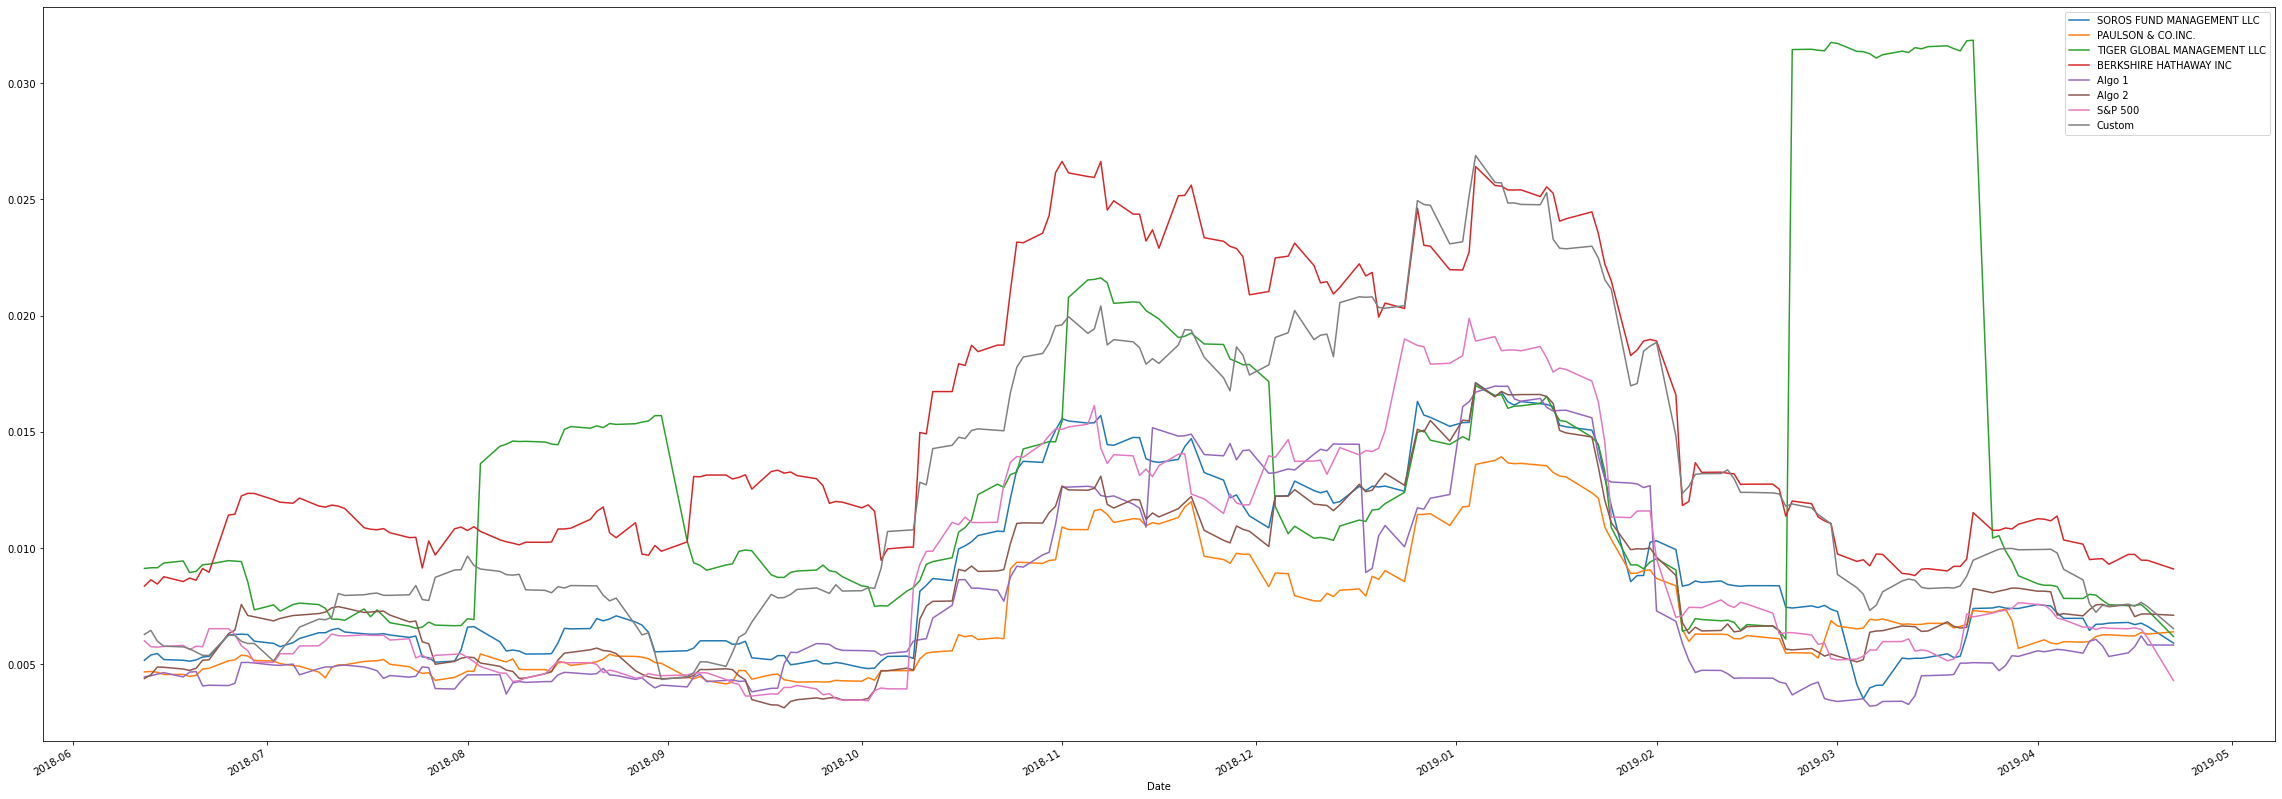

In [58]:
# Rolling
# YOUR CODE HERE

cp.rolling(window=21).std().plot(figsize=(40,15))

In [63]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
total_sharpe_ratio = (cp.mean() * 252) / (cpd_std * np.sqrt(252))

total_sharpe_ratio



SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

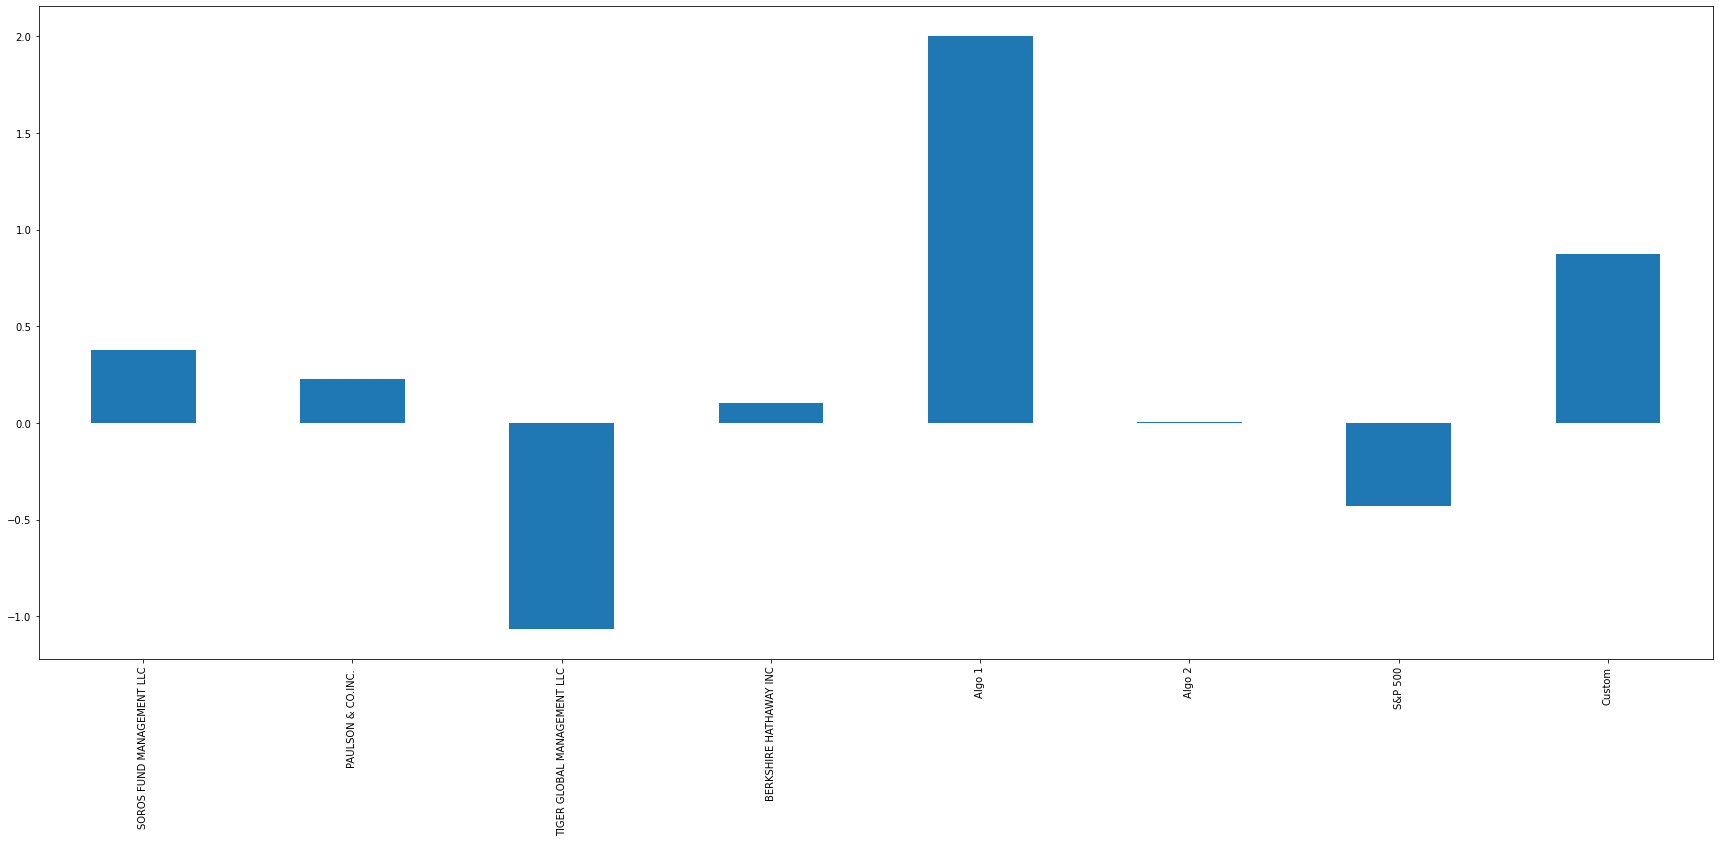

In [65]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

total_sharpe_ratio.plot(kind='bar', figsize=(30,12))

In [70]:
# Create a correlation analysis
correlation = cp.corr()

correlation.style.background_gradient(cmap = "viridis")

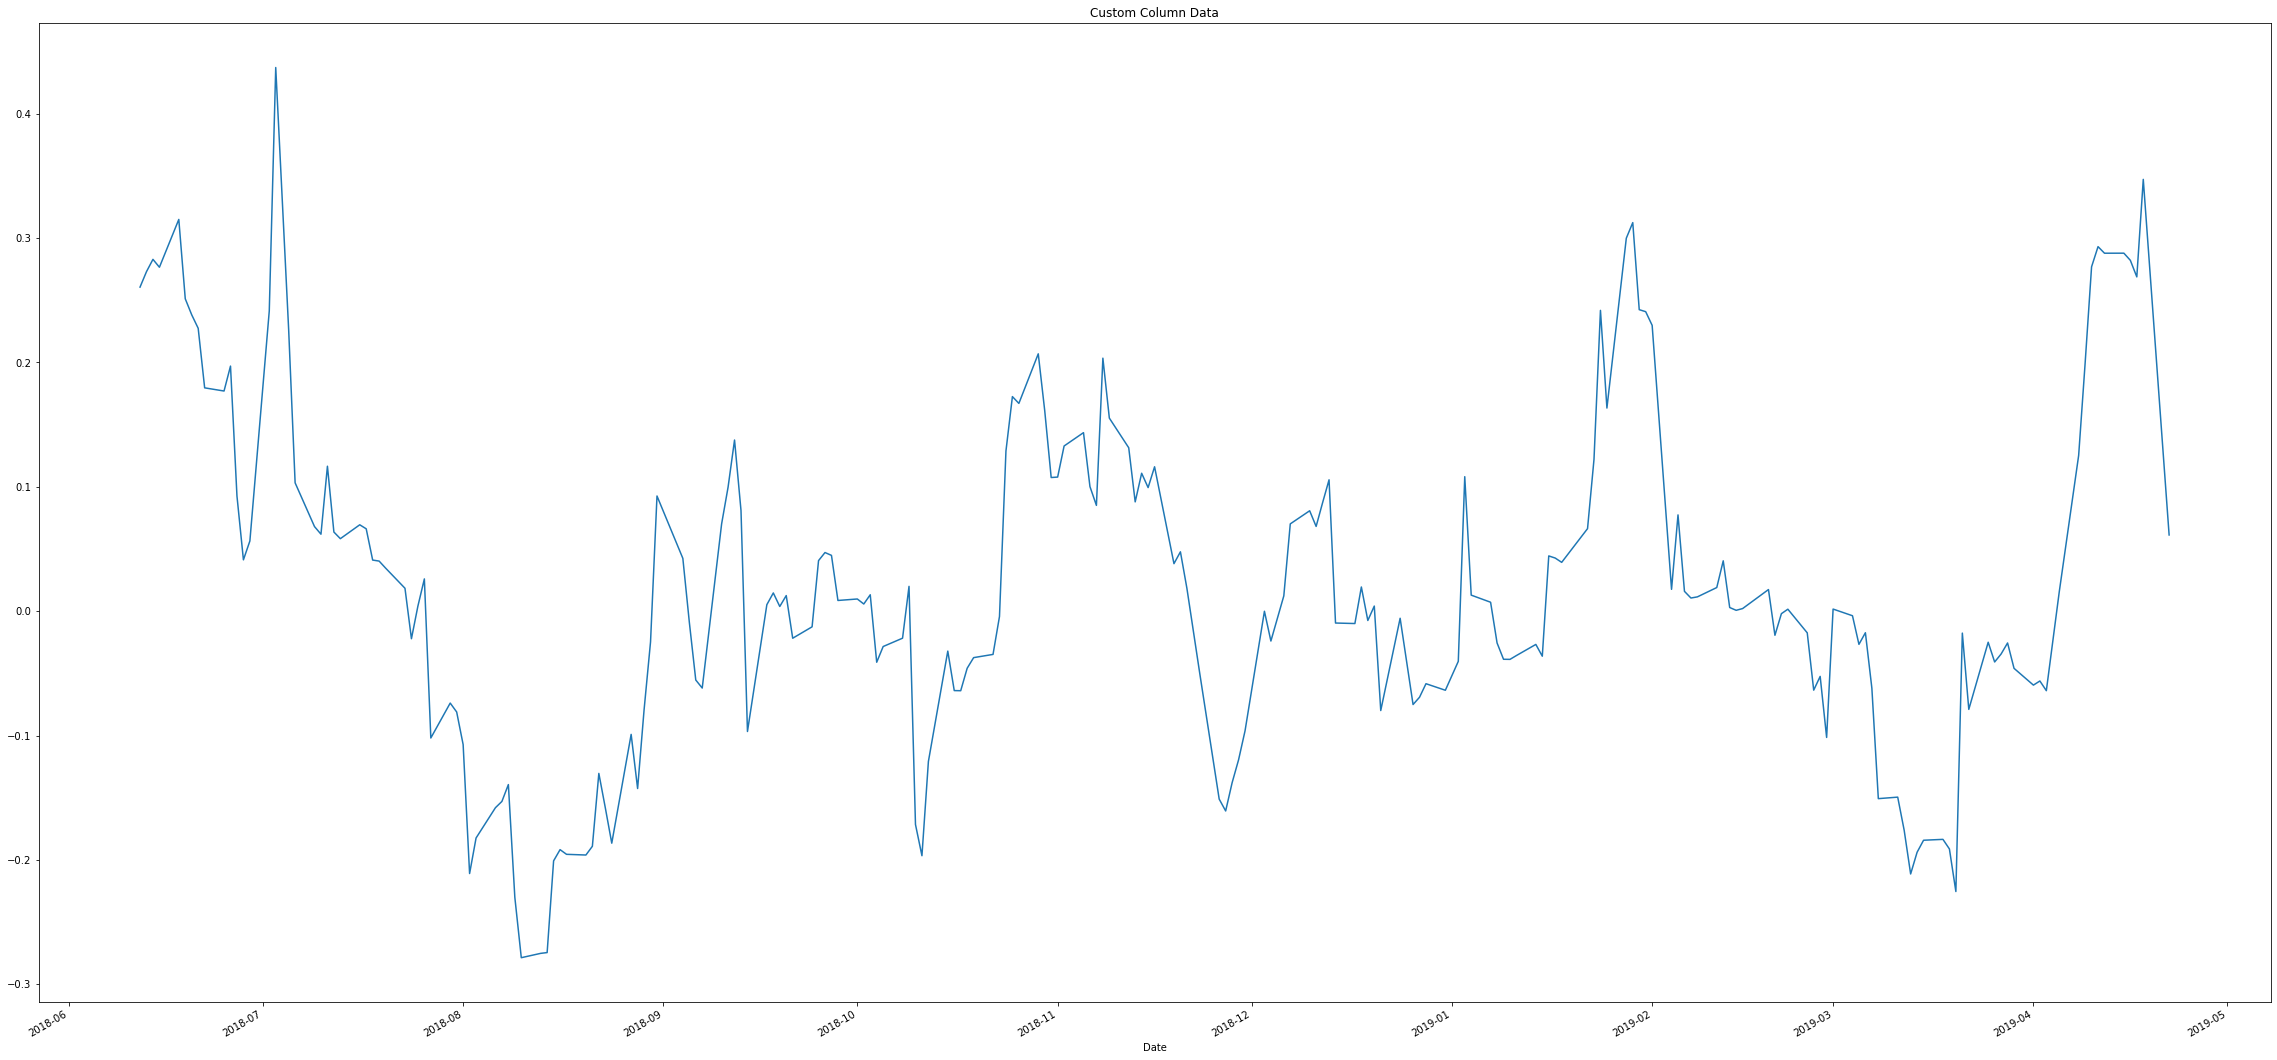

In [71]:
# Beta

beta2 = cp["Custom"].rolling(window=21).cov(cp["S&P 500"])

rolling_variance2 = cp["Custom"].rolling(window=21).var()

custom_beta = beta2 / rolling_variance2

custom_beta.plot(figsize=(40,20), title='Custom Column Data')